## Retrieve Data

In [9]:
import os
import sys
sys.path.append("..")


import password.config
from password.config import *
import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user=mysql_username,
  password=mysql_password,
  database="bestofu",
)


# u.id, u.name, u.gender, o.data, s.time_in_bed, s.time_asleep, s.wakeup_number, s.sleep_score, s.stress_score

In [10]:
mycursor = mydb.cursor()

sql_1 = """
SELECT id, name, gender, data, time_in_bed, time_asleep, wakeup_number, sleep_score, stress_score
FROM (
	SELECT id
		,name
		,gender
	FROM users
	) u
JOIN (
	SELECT user_id
		,data
	FROM daily_overall_data
	) o ON o.user_id = u.id
JOIN (
	SELECT user_id
		,date
		,time_in_bed
		,time_asleep
		,wakeup_number
		,sleep_score
		,stress_score
	FROM daily_statistics
	) s ON s.user_id = u.id
WHERE s.date BETWEEN '2021-11-01'
		AND '2021-11-30'
ORDER BY s.date
"""

col_name = ["u:id", "u:name", "u:gender", "data", "y:time_in_bed", 
            "y:time_asleep", "y:wakeup_number", "y:sleep_score", "y:stress_score"]

df = []
mycursor.execute(sql_1)
myresult = mycursor.fetchall()

for x in myresult:
  df.append(x)

df = pd.DataFrame(df, columns=col_name)
    

In [11]:
set_f = set()
for i in df.data:
    try:
        i_obj = eval(i)
    except NameError as ner:
        i_obj = eval(i.replace("true", "1").replace("false", "0"))

    for j in i_obj:
        if j not in set_f:
            set_f.add(j)

set_f  

{'VO2_max',
 'blood_diastolic_presure',
 'blood_glucose',
 'blood_systolic_presure',
 'body_temperature',
 'exercise_time',
 'heart_beat_series',
 'hight_hr_events',
 'hr_variability_SDNN',
 'low_hr_events',
 'oxygen_saturation',
 'recent_body_mass_index',
 'resespiratory_rate',
 'resting_hr',
 'walking_hr_verage'}

In [12]:
mycursor = mydb.cursor()

sql_1 = """
SELECT u.*, o.*, s.*
FROM (
	SELECT id
		,name
		,gender
	FROM users
	) u
JOIN (
	SELECT user_id
		,data->'$.VO2_max' as VO2_max
		,data->'$.blood_diastolic_presure' as blood_diastolic_presure
		,data->'$.blood_glucose' as blood_glucose
		,data->'$.blood_systolic_presure' as blood_systolic_presure
		,data->'$.body_temperature' as body_temperature
		,data->'$.exercise_time' as exercise_time
		,data->'$.heart_beat_series' as heart_beat_series
		,data->'$.hight_hr_events' as hight_hr_events
		,data->'$.hr_variability_SDNN' as hr_variability_SDNN
		,data->'$.low_hr_events' as low_hr_events
		,data->'$.oxygen_saturation' as oxygen_saturation
		,data->'$.recent_body_mass_index' as recent_body_mass_index
		,data->'$.resespiratory_rate' as resespiratory_rate
		,data->'$.resting_hr' as resting_hr
		,data->'$.walking_hr_verage' as walking_hr_verage
	FROM daily_overall_data
	) o ON o.user_id = u.id
JOIN (
	SELECT user_id
		,date
		,time_in_bed
		,time_asleep
		,wakeup_number
		,sleep_score
		,stress_score
	FROM daily_statistics
	) s ON s.user_id = u.id
WHERE s.date BETWEEN '2021-09-01'
		AND '2021-11-30'
ORDER BY s.date
"""

col_name = ["u:id", "u:name", "u:gender", "o.user_id",
			'd:VO2_max',
			'd:blood_diastolic_presure',
			'd:blood_glucose',
			'd:blood_systolic_presure',
			'd:body_temperature',
			'd:exercise_time',
			'd:heart_beat_series',
			'd:hight_hr_events',
			'd:hr_variability_SDNN',
			'd:low_hr_events',
			'd:oxygen_saturation',
			'd:recent_body_mass_index',
			'd:resespiratory_rate',
			'd:resting_hr',
			'd:walking_hr_verage',  "s.user_id", "u:date",
            "y:time_in_bed", "y:time_asleep", "y:wakeup_number", "y:sleep_score", "y:stress_score"]

df = []
mycursor.execute(sql_1)
myresult = mycursor.fetchall()

for x in myresult:
  df.append(x)

df = pd.DataFrame(df, columns=col_name)
    


## Data Profile

In [13]:
import os
import sys
import numpy as np
import pandas as pd
import altair as alt
sys.path.append("/Users/tuanzai/Desktop/Git/tools/tools")

from data_overview import *
from df_to_highchart import *


In [14]:
d_list = [x for x in df if x.startswith("d:")]
df[d_list] = df[d_list].replace("", np.nan).replace("true", 1).replace("false", 0).astype(float)
num_edd = edd(df[d_list], missing_value=np.nan, ignore_col=[], save_path=None)
display(num_edd)
print("\r\r\r===================== missing rate < 0.9 ====================")
display(num_edd[num_edd["missingrate"] <= 0.9])


====================== time cost: 0:00:00.418152 =====================



,var,type,sample_cnt,unique_values,missingrate,zerorate,mode,mean,std,min,qt1,qt5,qt25,qt50,qt75,qt95,qt99,max
0,d:VO2_max,float64,172742,76,0.918283,0.0,NaN,44.475021,5.606569,27.0,29.18,33.12,42.59,45.04,45.85,55.0,55.0,55.0
1,d:blood_diastolic_presure,float64,172742,2,0.979924,0.0,NaN,126.5,13.501947,113.0,113.0,113.0,113.0,126.5,140.0,140.0,140.0,140.0
2,d:blood_glucose,float64,172742,1,0.989962,0.0,NaN,36.031176,0.0,36.031176,36.031176,36.031176,36.031176,36.031176,36.031176,36.031176,36.031176,36.031176
3,d:blood_systolic_presure,float64,172742,2,0.979924,0.0,NaN,151.0,39.005624,112.0,112.0,112.0,112.0,151.0,190.0,190.0,190.0,190.0
4,d:body_temperature,float64,172742,2,0.979924,0.0,NaN,37.6,0.400058,37.2,37.2,37.2,37.2,37.6,38.0,38.0,38.0,38.0
5,d:exercise_time,float64,172742,1,0.403341,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,d:heart_beat_series,float64,172742,83,0.345405,0.0,NaN,47.353055,13.582514,10.0,10.0,23.0,38.0,50.0,57.0,64.0,77.0,117.0
7,d:hight_hr_events,float64,172742,1,0.997922,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,d:hr_variability_SDNN,float64,172742,1007,0.194915,0.0,NaN,44.57803,20.95219,6.58597,14.39401,20.879116,29.937435,40.438225,54.056683,78.160095,132.896576,220.633392
9,d:low_hr_events,float64,172742,1,0.998298,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


===================== missing rate < 0.9 ====================


,var,type,sample_cnt,unique_values,missingrate,zerorate,mode,mean,std,min,qt1,qt5,qt25,qt50,qt75,qt95,qt99,max
5,d:exercise_time,float64,172742,1,0.403341,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,d:heart_beat_series,float64,172742,83,0.345405,0.0,NaN,47.353055,13.582514,10.0,10.0,23.0,38.0,50.0,57.0,64.0,77.0,117.0
8,d:hr_variability_SDNN,float64,172742,1007,0.194915,0.0,NaN,44.57803,20.95219,6.58597,14.39401,20.879116,29.937435,40.438225,54.056683,78.160095,132.896576,220.633392
10,d:oxygen_saturation,float64,172742,16,0.841706,0.0,NaN,0.942069,0.034551,0.85,0.8543,0.88,0.92,0.94,0.97,0.99,1.0,1.0
13,d:resting_hr,float64,172742,58,0.208577,0.0,NaN,62.429304,11.819106,45.0,49.0,52.0,57.0,60.0,63.0,84.0,119.0,145.0
14,d:walking_hr_verage,float64,172742,146,0.275225,0.0,NaN,101.614282,15.510859,64.0,70.0,77.5,91.0,99.5,113.0,128.0,138.0,164.0


In [15]:
dlist_useful = num_edd[num_edd["missingrate"] <= 0.9]["var"].to_list()
display(dlist_useful)

num_edd_plot = edd(df[dlist_useful], missing_value=np.nan, ignore_col=[], save_path=None)
num_edd_plot


['d:exercise_time',
 'd:heart_beat_series',
 'd:hr_variability_SDNN',
 'd:oxygen_saturation',
 'd:resting_hr',
 'd:walking_hr_verage']


====================== time cost: 0:00:00.105856 =====================



,var,type,sample_cnt,unique_values,missingrate,zerorate,mode,mean,std,min,qt1,qt5,qt25,qt50,qt75,qt95,qt99,max
0,d:exercise_time,float64,172742,1,0.403341,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,d:heart_beat_series,float64,172742,83,0.345405,0.0,NaN,47.353055,13.582514,10.0,10.0,23.0,38.0,50.0,57.0,64.0,77.0,117.0
2,d:hr_variability_SDNN,float64,172742,1007,0.194915,0.0,NaN,44.57803,20.95219,6.58597,14.39401,20.879116,29.937435,40.438225,54.056683,78.160095,132.896576,220.633392
3,d:oxygen_saturation,float64,172742,16,0.841706,0.0,NaN,0.942069,0.034551,0.85,0.8543,0.88,0.92,0.94,0.97,0.99,1.0,1.0
4,d:resting_hr,float64,172742,58,0.208577,0.0,NaN,62.429304,11.819106,45.0,49.0,52.0,57.0,60.0,63.0,84.0,119.0,145.0
5,d:walking_hr_verage,float64,172742,146,0.275225,0.0,NaN,101.614282,15.510859,64.0,70.0,77.5,91.0,99.5,113.0,128.0,138.0,164.0


In [16]:
columns = ["missingrate", 'mean', 'std', 'min', 'qt1', 'qt5', 'qt25', 'qt50', 'qt75', 'qt95', 'qt99', 'max', "sample_cnt"]

In [17]:
num_edd_plot[columns]

,missingrate,mean,std,min,qt1,qt5,qt25,qt50,qt75,qt95,qt99,max,sample_cnt
0,0.403341,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,172742
1,0.345405,47.353055,13.582514,10.0,10.0,23.0,38.0,50.0,57.0,64.0,77.0,117.0,172742
2,0.194915,44.57803,20.95219,6.58597,14.39401,20.879116,29.937435,40.438225,54.056683,78.160095,132.896576,220.633392,172742
3,0.841706,0.942069,0.034551,0.85,0.8543,0.88,0.92,0.94,0.97,0.99,1.0,1.0,172742
4,0.208577,62.429304,11.819106,45.0,49.0,52.0,57.0,60.0,63.0,84.0,119.0,145.0,172742
5,0.275225,101.614282,15.510859,64.0,70.0,77.5,91.0,99.5,113.0,128.0,138.0,164.0,172742


In [18]:
# num_edd_plot = edd(df[dlist_useful].fillna(-1), missing_value=np.nan, ignore_col=[], save_path=None)
edd1 = lambda df: edd(df[dlist_useful+[x for x in df if x.startswith("y:")]])
stat_by_date = df[dlist_useful + ["u:date"] + [x for x in df if x.startswith("y:")]].groupby("u:date").apply(edd1)


====================== time cost: 0:00:00.048869 =====================


====================== time cost: 0:00:00.045953 =====================


====================== time cost: 0:00:00.035270 =====================


====================== time cost: 0:00:00.033233 =====================


====================== time cost: 0:00:00.030728 =====================


====================== time cost: 0:00:00.030848 =====================


====================== time cost: 0:00:00.033664 =====================


====================== time cost: 0:00:00.032276 =====================


====================== time cost: 0:00:00.031849 =====================


====================== time cost: 0:00:00.032608 =====================


====================== time cost: 0:00:00.031760 =====================


====================== time cost: 0:00:00.041779 =====================


====================== time cost: 0:00:00.049673 =====================


====================== time cost: 0:00:00.038153 =

In [19]:
import altair as alt
import pandas as pd
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')


# url = ('https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/' +
#       'chapters/en/slides/module2/data/world-data-gapminder.csv')
# gm = pd.read_csv(url, parse_dates=['year'])
# gm



# alt.Chart(gm).mark_line().encode(
#     x='year',
#     y='sum(population)')

RendererRegistry.enable('mimetype')

### stablity of Feature

In [20]:
def stat_distribution(source, title):
    
    print(title)
    
    bar = alt.Chart(source).mark_bar(opacity=0.45, color='#57A44C').encode(
        x = 'date:T', 
        y = alt.Y("sample_cnt", axis = alt.Axis(title='Total Count', titleColor='#57A44C')),
    ).properties(
        width = 600
    ).interactive()

    source = source[["date", "mean", "std", "min", "qt1", "qt25", "qt75", "max", "missingrate"]].melt("date", var_name='category', value_name='y')

    selection = alt.selection_multi(fields=['category'], bind='legend')
    line = alt.Chart(source).mark_circle(interpolate='monotone').encode(
        x = 'date:T', 
        y=alt.Y("y:Q", axis = alt.Axis(title='Percentage stats', titleColor='#5276A7')),
        color=alt.Color('category:N'),
        # opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
        tooltip="y:Q"
    )

    line = (line + line.mark_line()).properties(
        width = 600
    ).interactive()

    display(alt.layer(bar, line).resolve_scale(
        y = 'independent'
    ))

In [21]:
stat_by_date["missingrate"] = stat_by_date["missingrate"]*100

In [22]:
for i in dlist_useful:
    source = stat_by_date.loc[stat_by_date["var"] == i, columns].reset_index().rename(columns={"u:date":"date"})
    stat_distribution(source, i)

d:exercise_time


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


d:heart_beat_series


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


d:hr_variability_SDNN


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


d:oxygen_saturation


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


d:resting_hr


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


d:walking_hr_verage


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [23]:
for i in [x for x in df if x.startswith("y:")]:
    source = stat_by_date.loc[stat_by_date["var"] == i, columns].reset_index().rename(columns={"u:date":"date"})
    stat_distribution(source, i)

y:time_in_bed


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


y:time_asleep


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


y:wakeup_number


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


y:sleep_score


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


y:stress_score


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### feature and score

In [24]:
df_plots = df[dlist_useful+[x for x in df if x.startswith("y:")]]

In [25]:
corr_df = df_plots[[x for x in df_plots if x != "d:exercise_time"]].dropna().corr()
display(corr_df)

source = corr_df.reset_index().melt("index")
alt.Chart(source).mark_square().encode(
    x='index:O',
    y='variable:O',
    color='value:Q',
    size='value:Q',
    tooltip='value:Q',
).properties(
    width = 400,
    height = 400
)

,d:heart_beat_series,d:hr_variability_SDNN,d:oxygen_saturation,d:resting_hr,d:walking_hr_verage,y:time_in_bed,y:time_asleep,y:wakeup_number,y:sleep_score,y:stress_score
d:heart_beat_series,1.000000,-0.004937,-0.037764,0.143780,-0.027759,-0.086392,-0.063504,-0.102173,0.005919,-0.114626
d:hr_variability_SDNN,-0.004937,1.000000,-0.145452,-0.140395,-0.047158,0.023387,0.017191,0.027659,-0.001602,0.031031
d:oxygen_saturation,-0.037764,-0.145452,1.000000,0.020198,0.052107,-0.017368,-0.012767,-0.020540,0.001190,-0.023044
d:resting_hr,0.143780,-0.140395,0.020198,1.000000,0.327088,-0.148229,-0.108959,-0.175306,0.010156,-0.196673
d:walking_hr_verage,-0.027759,-0.047158,0.052107,0.327088,1.000000,-0.104528,-0.076836,-0.123623,0.007162,-0.138690
y:time_in_bed,-0.086392,0.023387,-0.017368,-0.148229,-0.104528,1.000000,0.901347,0.654012,0.251678,0.083897
y:time_asleep,-0.063504,0.017191,-0.012767,-0.108959,-0.076836,0.901347,1.000000,0.538953,0.497875,-0.012807
y:wakeup_number,-0.102173,0.027659,-0.020540,-0.175306,-0.123623,0.654012,0.538953,1.000000,0.090045,0.237030
y:sleep_score,0.005919,-0.001602,0.001190,0.010156,0.007162,0.251678,0.497875,0.090045,1.000000,-0.007514
y:stress_score,-0.114626,0.031031,-0.023044,-0.196673,-0.138690,0.083897,-0.012807,0.237030,-0.007514,1.000000


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


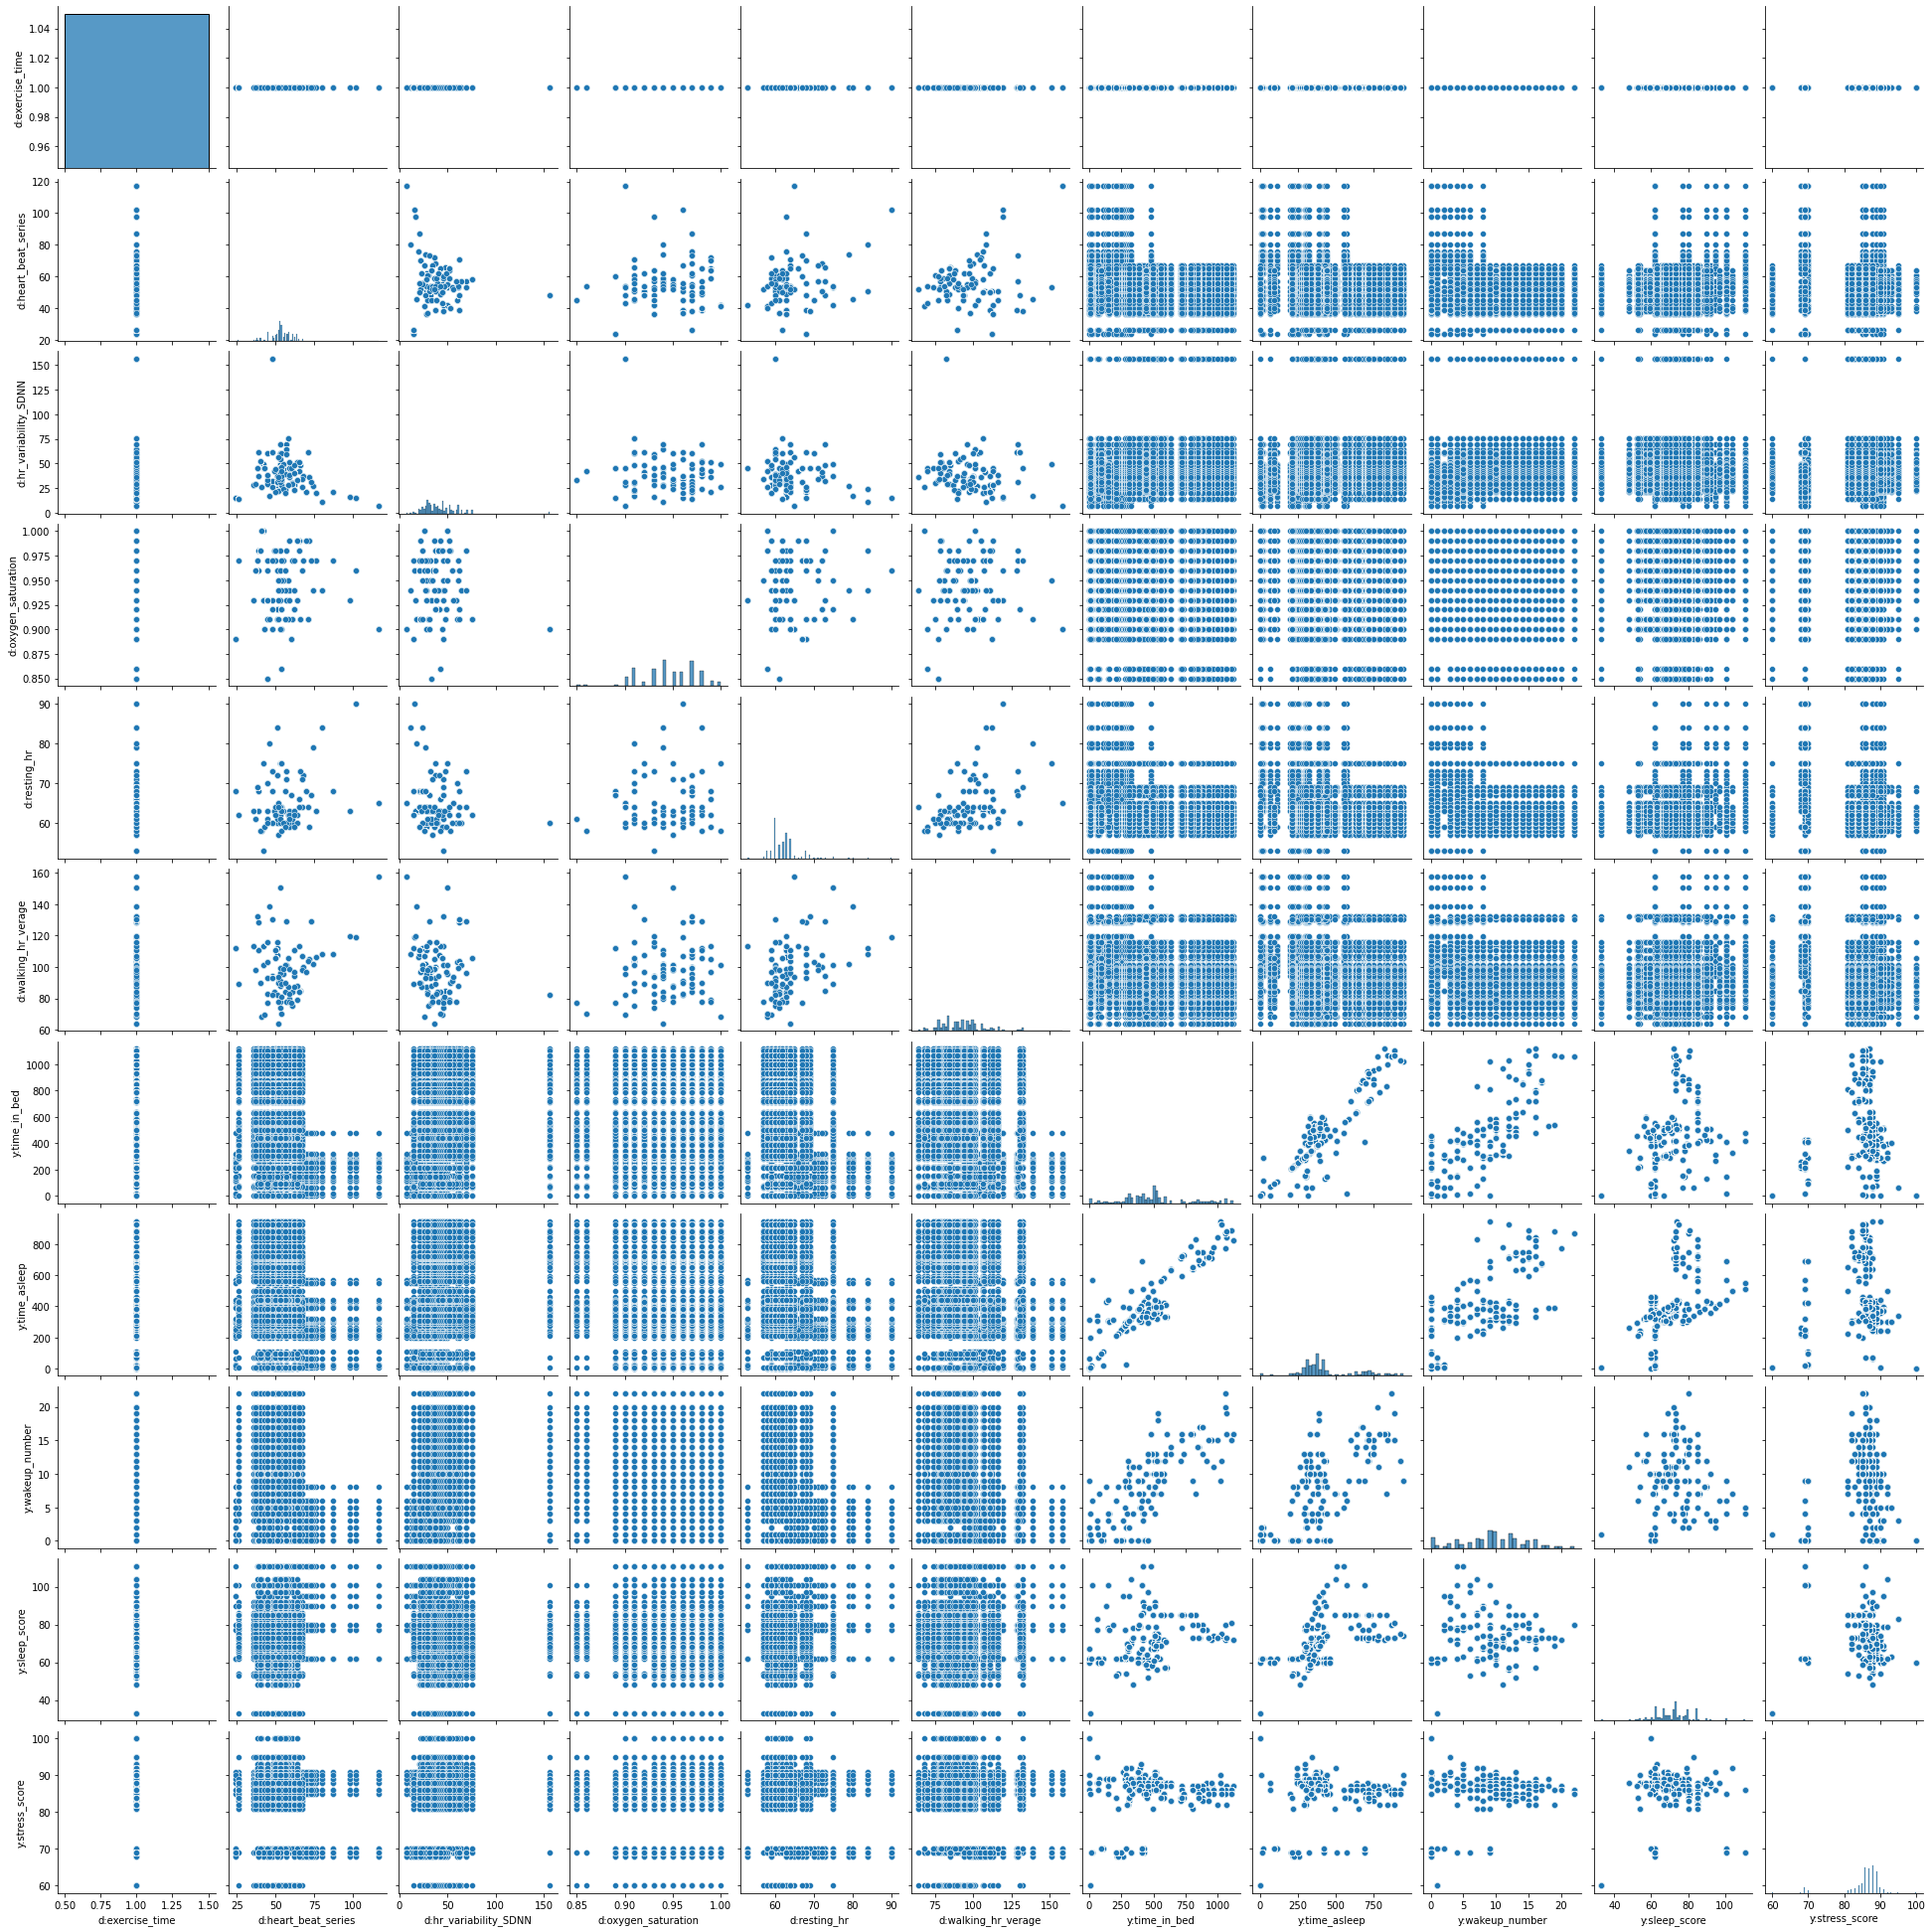

In [26]:
import seaborn as sns
sns.pairplot(df_plots.dropna())


## IV related

In [27]:
df[["y:sleep_score"]].dropna().max()

y:sleep_score    111.0
dtype: float64

In [28]:
qmin, qmax = df["y:sleep_score"].quantile(0.25), df["y:sleep_score"].quantile(0.75)

In [29]:
check_list = [
#  'd:exercise_time',
 'd:heart_beat_series',
 'd:hr_variability_SDNN',
 'd:oxygen_saturation',
 'd:resting_hr',
 'd:walking_hr_verage',
 'y:time_in_bed',
 'y:time_asleep',
 'y:wakeup_number',
#  'y:sleep_score',
#  'y:stress_score'
 ]

for i in check_list:
    pass

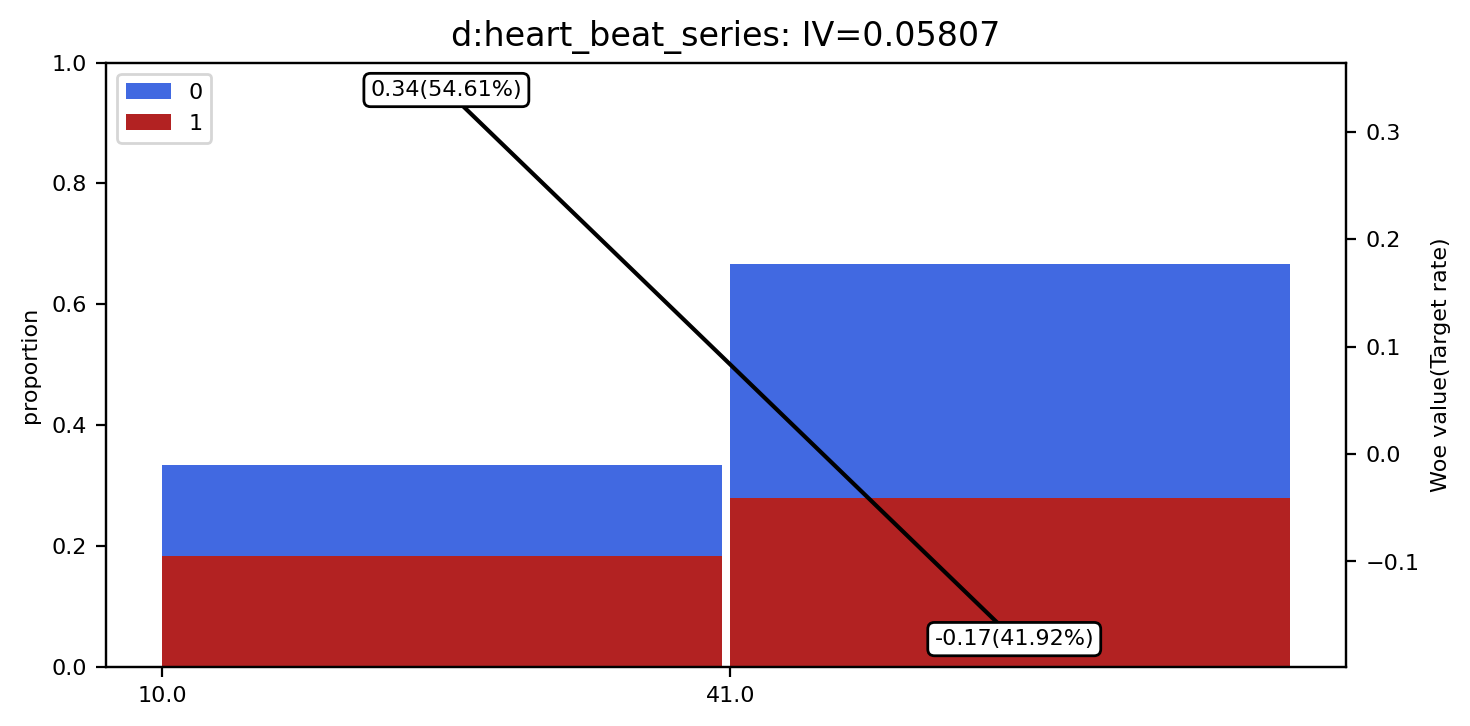

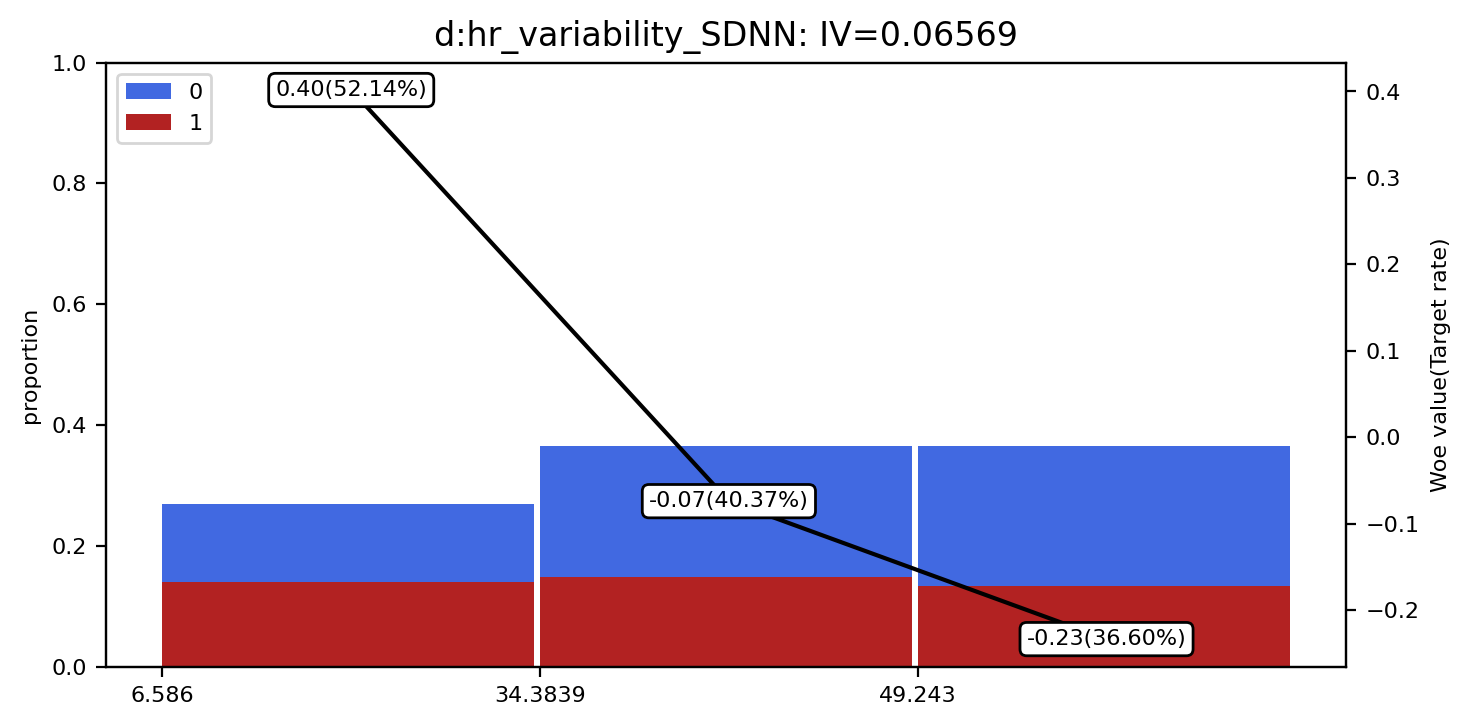

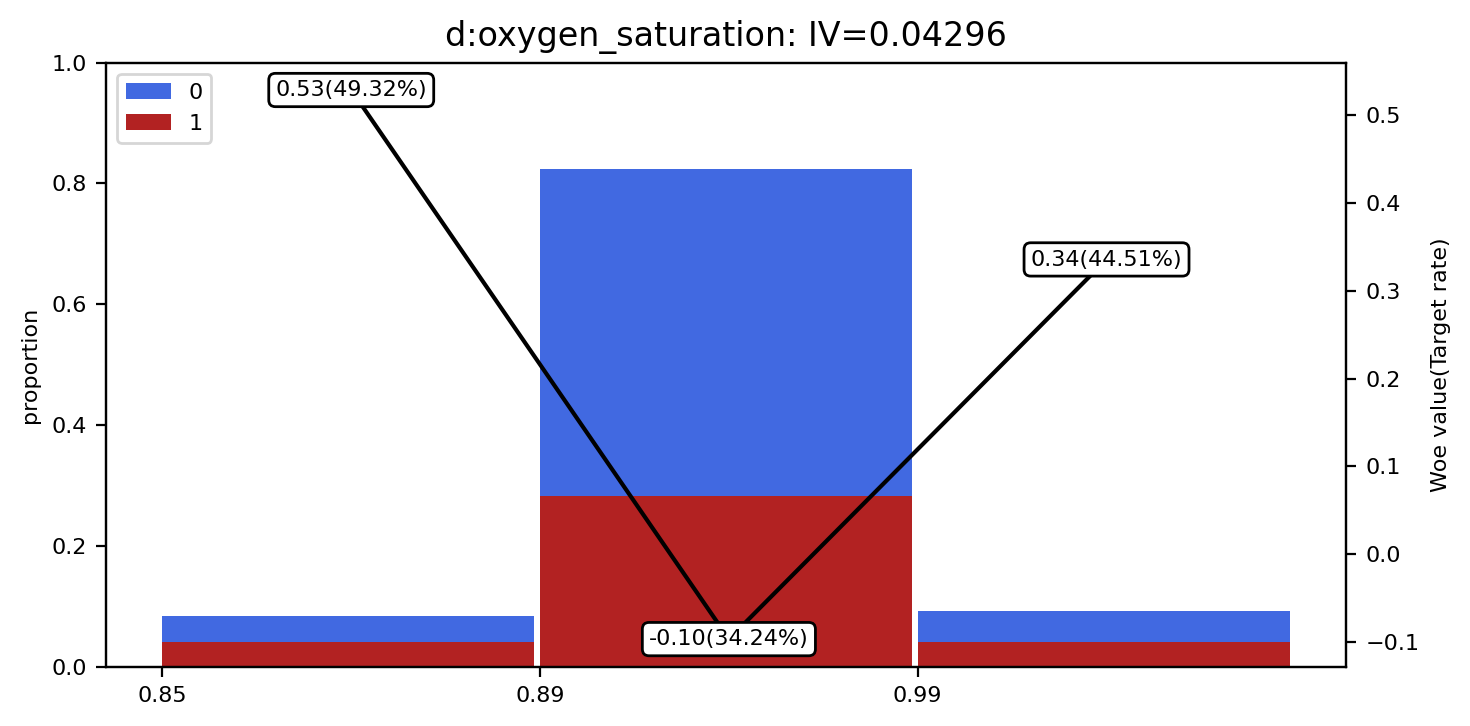

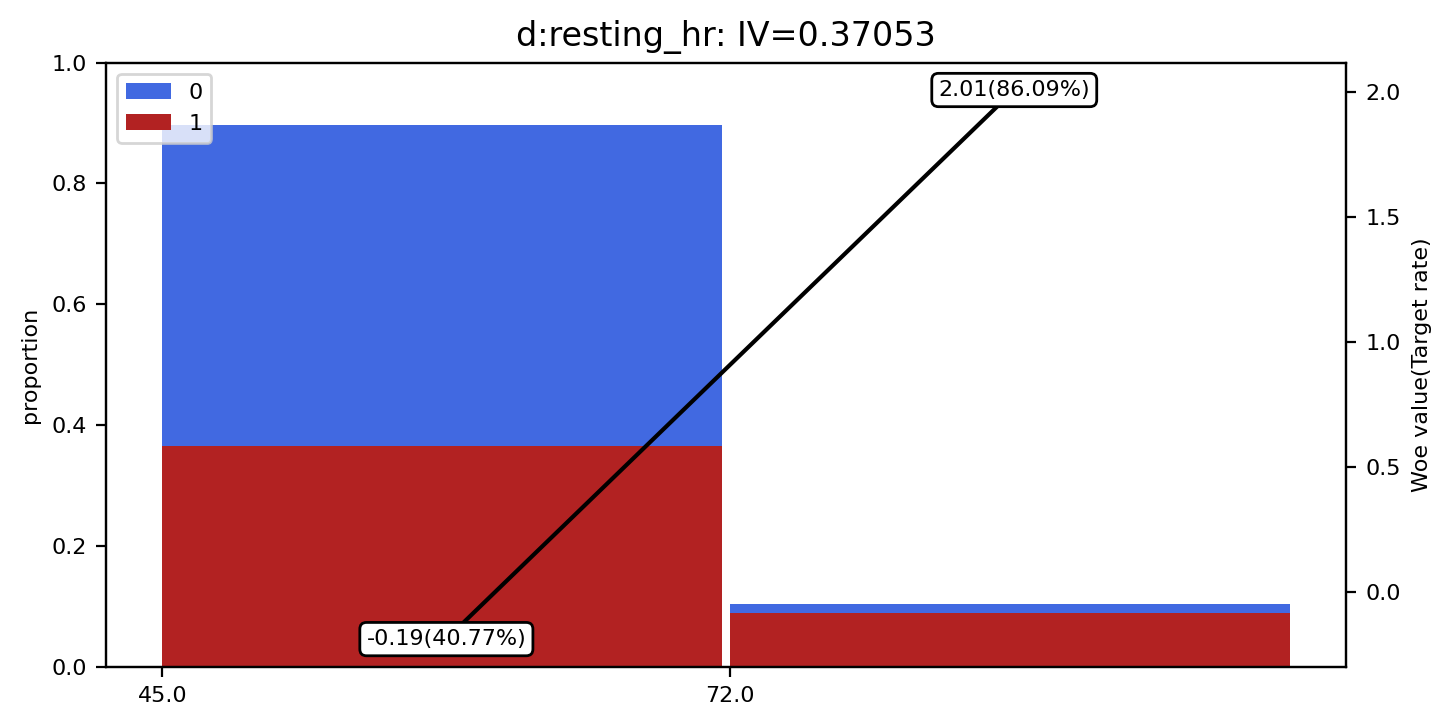

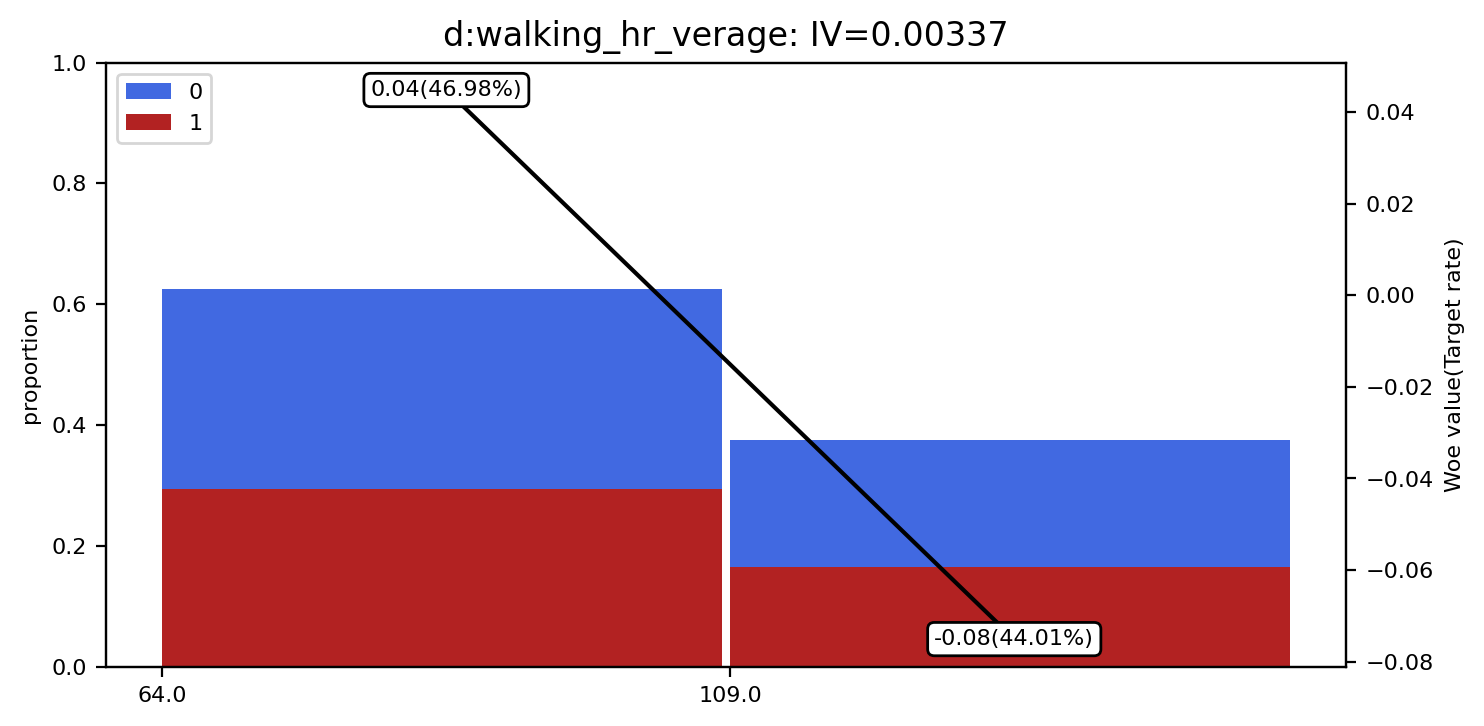

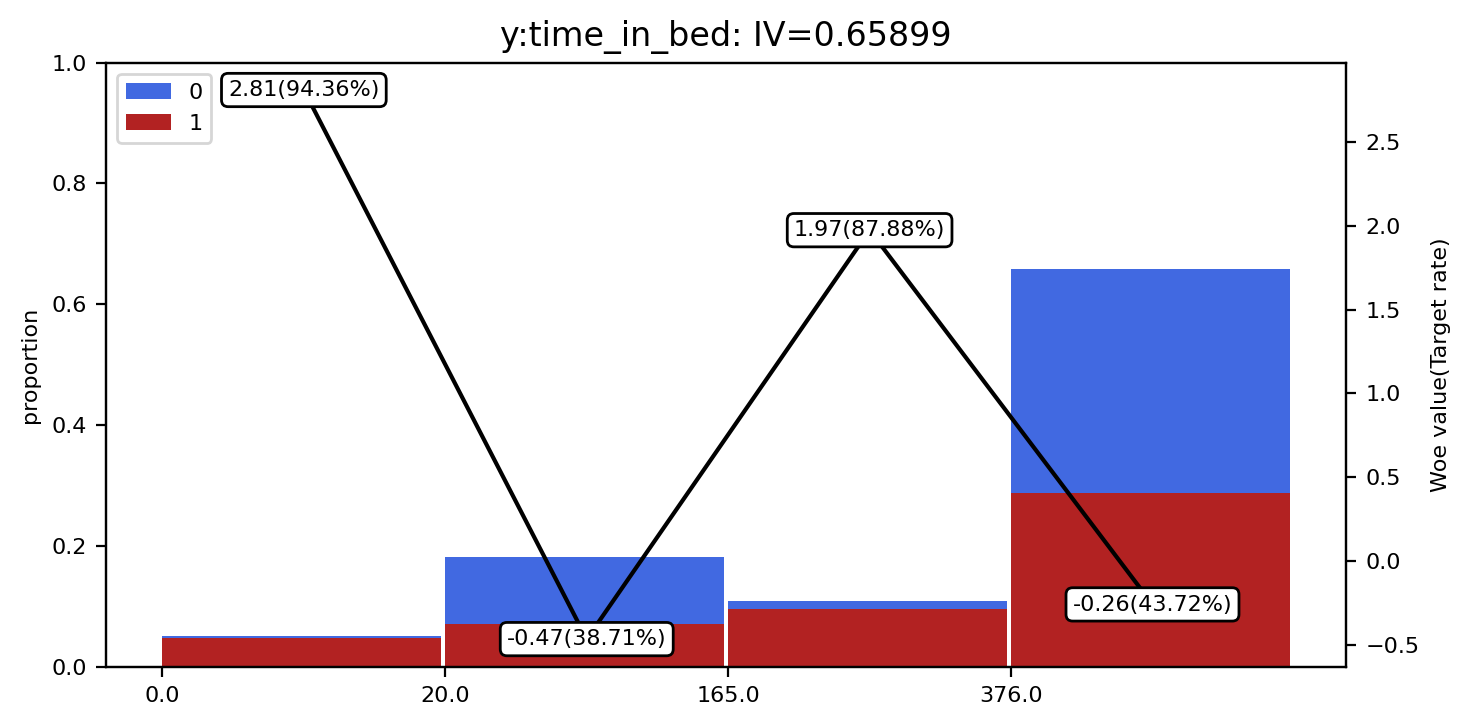

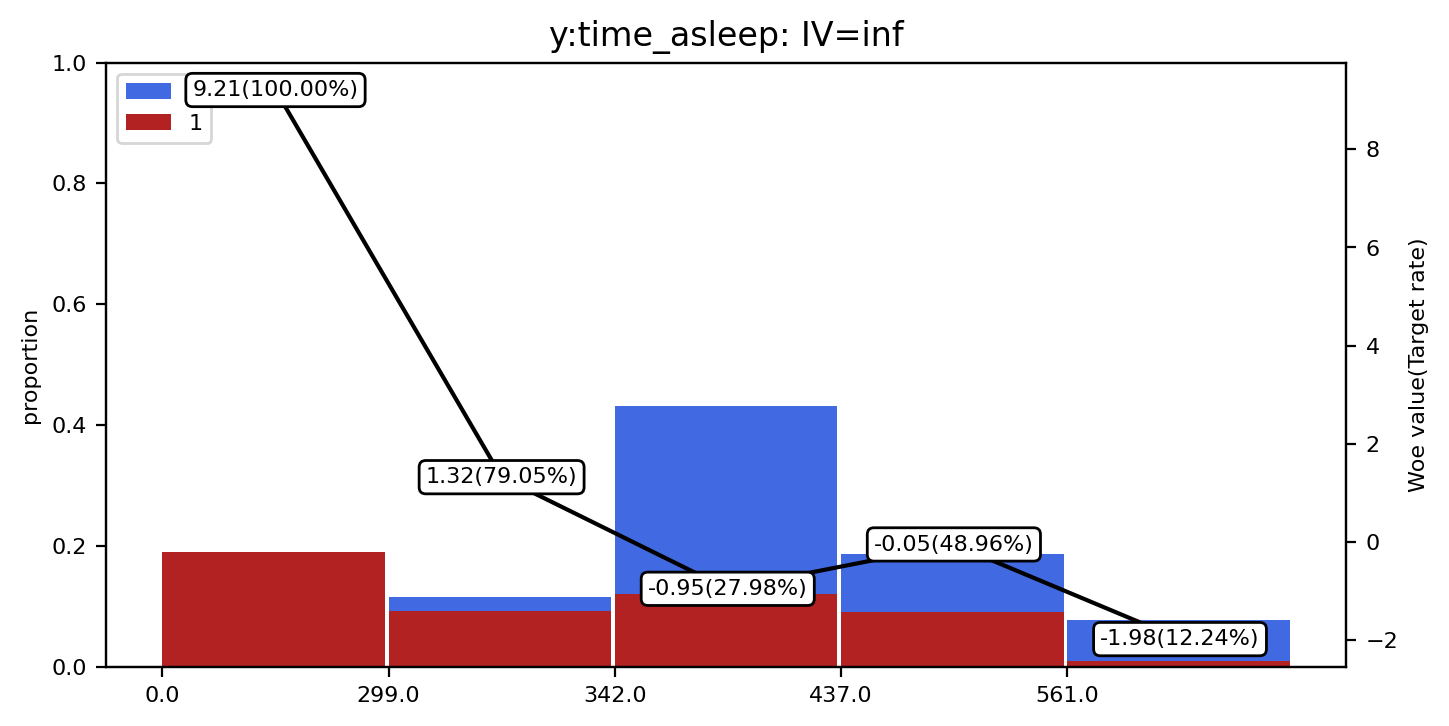

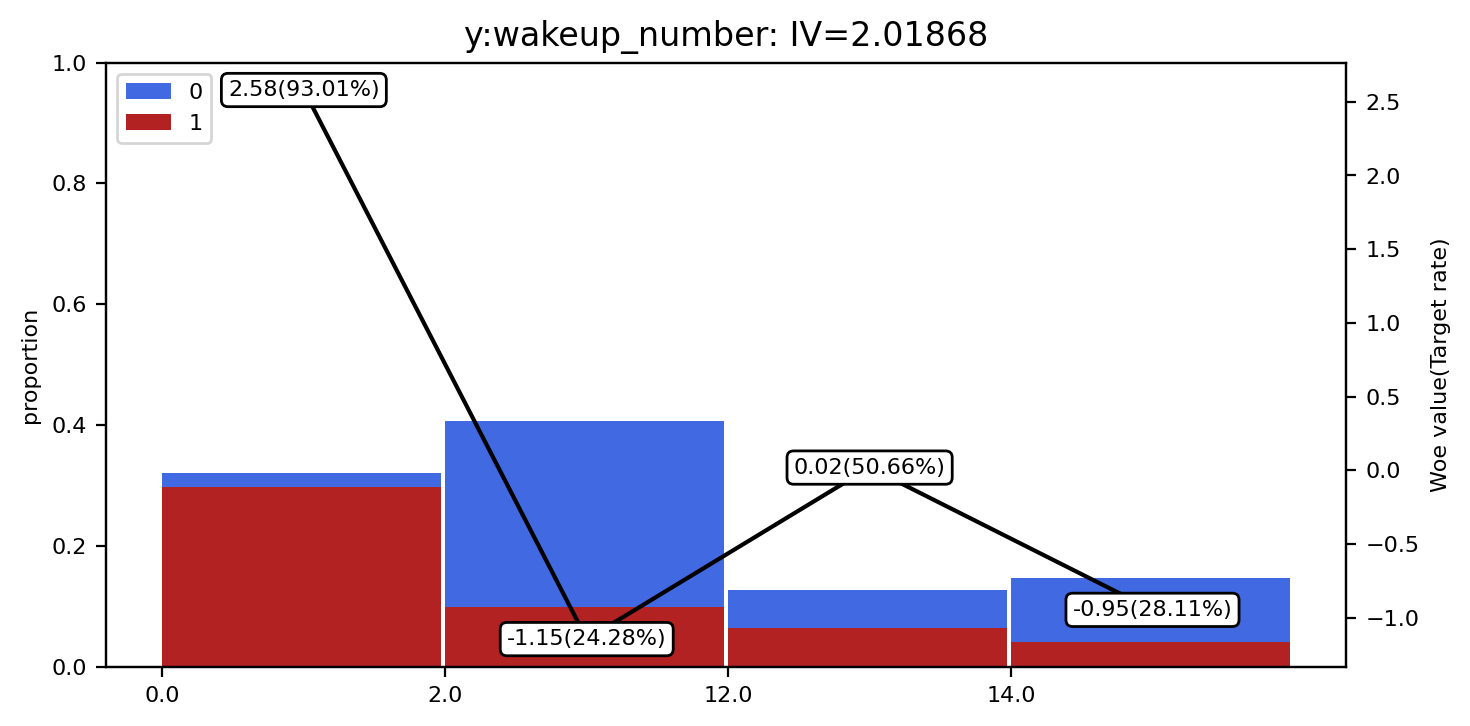

In [30]:
from woe_tools import *


def handle_label(x):
    if x<qmin:
        return 1
    elif x>qmax:
        return 0
    else:
        return -1


for i in check_list:
    df_tmp = df[["y:sleep_score", i]].dropna()
    df_tmp["y:sleep_score"] = df_tmp["y:sleep_score"].apply(handle_label)
    df_tmp = df_tmp[df_tmp["y:sleep_score"] != -1]
    numwoe_autobinning(df_tmp, i, "y:sleep_score")
